In [94]:
%matplotlib inline
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem.porter import *
stemmer = PorterStemmer()


In [65]:
data = pd.read_csv("DurhamCityOriginalDataFY19.csv")
data.drop(['Unnamed: 0'], axis=1,inplace=True)
data['label']='0'
data.shape
data.head()

,page_number,word,label
0,1,fiscal,0
1,1,year,0
2,1,adopted,0
3,1,budget,0
4,1,july,0


In [66]:
data1 = pd.read_csv("DurhamCityOriginalDataFY20.csv")
data1.drop(['Unnamed: 0'], axis=1,inplace=True)
data1['label']='1'
data1.shape
data1.head()

,page_number,word,label
0,1,fiscal,1
1,1,year,1
2,1,adopted,1
3,1,budget,1
4,1,july,1


In [67]:
len(data)

76838

In [68]:
len(data1)

81524

In [69]:
cityBudget=pd.concat([data,data1])
len(cityBudget)

158362

In [70]:
cityBudget.word.unique()

array(['fiscal', 'year', 'adopted', ..., 'telling', 'pictured',
       'courthouse'], dtype=object)

In [71]:
cityBudget['word'].value_counts()

the                8248
and                7154
of                 4654
to                 3951
fy                 3442
for                2841
in                 2102
a                  1792
city               1603
fund               1448
durham             1220
services           1115
is                 1087
program            1086
with               1082
by                  781
from                755
are                 738
on                  720
department          694
budget              675
this                669
revenues            668
as                  667
community           650
development         633
that                626
other               625
management          593
service             564
                   ... 
futsal                1
searchable            1
canal                 1
workplan              1
barricading           1
storegas              1
centro                1
rest                  1
bleed                 1
applicantfiscal       1
steadfast       

In [72]:
wd_counts = Counter()
for i, row in data.iterrows():
    wd_counts.update(row['word'].split())

In [73]:
for sw in stopwords.words('english'):
    del wd_counts[sw]

In [74]:
wd_counts.most_common(20)

[('fy', 1781),
 ('city', 783),
 ('fund', 736),
 ('durham', 585),
 ('services', 574),
 ('program', 548),
 ('development', 341),
 ('department', 337),
 ('revenues', 336),
 ('budget', 306),
 ('community', 294),
 ('management', 289),
 ('water', 287),
 ('service', 282),
 ('total', 281),
 ('public', 274),
 ('fte', 269),
 ('general', 265),
 ('funds', 255),
 ('capital', 246)]

In [75]:
len(wd_counts)

6108

In [76]:
wd_counts1 = Counter()
for i, row in data1.iterrows():
    wd_counts1.update(row['word'].split())

In [77]:
for sw in stopwords.words('english'):
    del wd_counts1[sw]

In [78]:
wd_counts1.most_common(20)

[('fy', 1661),
 ('city', 820),
 ('fund', 712),
 ('durham', 635),
 ('services', 541),
 ('program', 538),
 ('budget', 369),
 ('department', 357),
 ('community', 356),
 ('revenues', 332),
 ('management', 304),
 ('development', 292),
 ('service', 282),
 ('total', 282),
 ('public', 264),
 ('general', 259),
 ('water', 250),
 ('funds', 245),
 ('capital', 241),
 ('projects', 240)]

In [79]:
len(wd_counts1)

6364

In [80]:
#most common words in the combined datasets
wd_counts2 = Counter()
for i, row in cityBudget.iterrows():
    wd_counts2.update(row['word'].split())

In [81]:
for sw in stopwords.words('english'):
    del wd_counts2[sw]

In [82]:
wd_counts2.most_common(20)

[('fy', 3442),
 ('city', 1603),
 ('fund', 1448),
 ('durham', 1220),
 ('services', 1115),
 ('program', 1086),
 ('department', 694),
 ('budget', 675),
 ('revenues', 668),
 ('community', 650),
 ('development', 633),
 ('management', 593),
 ('service', 564),
 ('total', 563),
 ('public', 538),
 ('water', 537),
 ('general', 524),
 ('fte', 509),
 ('funds', 500),
 ('capital', 487)]

In [83]:
len(wd_counts2)

7121

In [84]:
from wordcloud import WordCloud

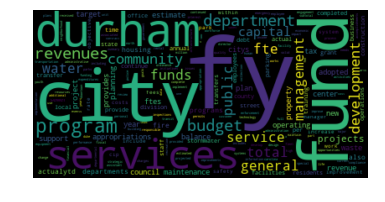

In [85]:
wc = WordCloud().generate_from_frequencies(wd_counts2)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

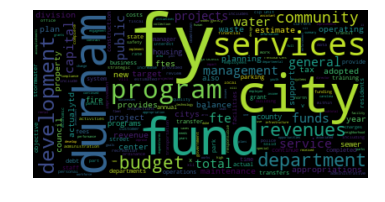

In [86]:
wc = WordCloud().generate_from_frequencies(wd_counts)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

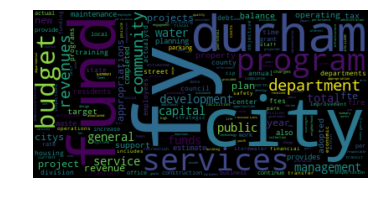

In [87]:
wc = WordCloud().generate_from_frequencies(wd_counts1)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [88]:
data['word'].describe()

count     76838
unique     6222
top         the
freq       3914
Name: word, dtype: object

In [89]:
data1['word'].describe()

count     81524
unique     6477
top         the
freq       4334
Name: word, dtype: object

In [102]:
# function to clean text
def review_to_words(raw_review):
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 3. Remove Stopwords. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]  #returns a list 
    #
    # 5. Stem words. Need to define porter stemmer above
    singles = [stemmer.stem(word) for word in meaningful_words]
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( singles ))  

# apply it to our text data 
# dataset is named wine_data and the text are in the column "wmn"
processed_wmn = [ review_to_words(text) for text in cityBudget.word]

In [103]:
def build_corpus(data):
    "Creates a list of lists containing words"
    corpus = []
    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)    
           
    return corpus

corpus = build_corpus(processed_wmn) 

In [104]:
from gensim.models import word2vec
# run the model
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=1000, workers=4)

C:\Users\messi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


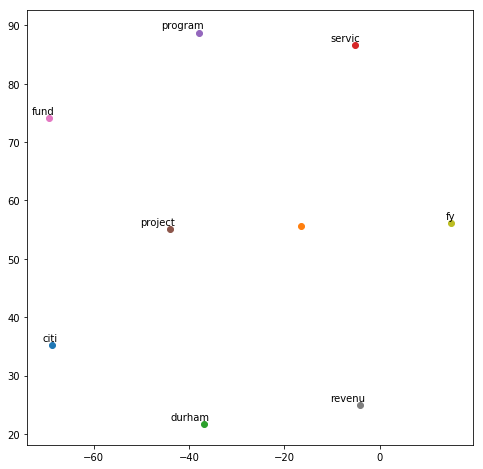

In [105]:
# import the t-SNE library and matplotlib for plotting
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# define the function to compute the dimensionality reduction
# and then produce the biplot
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
# call the function on our dataset
tsne_plot(model)